# Instantiate

In [4]:
from sys import path
path.append("../../")

In [5]:
from big_five_classifier.train_classifier import Model

In [6]:
from big_five_classifier.classifier import BFiveClassifier

In [7]:
classifier = BFiveClassifier()

In [8]:
text = "I feel very sad all the time"

In [10]:
demo_calssification = classifier.classify([text])
demo_calssification

{'OPN': 73.29151515151516,
 'CON': 57.0775821596245,
 'EXT': 52.74218236499336,
 'AGR': 64.35870646766175,
 'NEU': 34.25238095238093}

# Create Plotter

In [11]:
import matplotlib.pyplot as plt
from math import pi

def plot_radar(val):
    fig = plt.figure(figsize = (6,6))
    fig.patch.set_facecolor('#FFFFFF')


    ax = plt.subplot(polar = "True")

    categories = ["Openness",
                  "Conscientiousness",
                  "Extraversion",
                  "Agreeableness",
                  "Nueroticism",]
    
    N = len(categories)

    values = [val["OPN"],
             val["CON"],
             val["EXT"],
             val["AGR"],
             val["NEU"],]
    
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles,values,marker = '.')
    plt.fill(angles, values, alpha = 0.3)

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([0,20,40,60,80,100], color = "grey", size = 10)
    plt.ylim(0,100)
    plt.show()

In [32]:
import matplotlib.pyplot as plt
from math import pi
from typing import List, Dict

def plot_radars(vals:List[Dict], strength = 1.0):
    vals = [*vals]
    fig = plt.figure(figsize = (6,6))
    fig.patch.set_facecolor('#FFFFFF')
    ax = plt.subplot(polar = "True")

    categories = ["Openness",
                  "Conscientiousness",
                  "Extraversion",
                  "Agreeableness",
                  "Nueroticism",]
    
    N = len(categories)

    for val in vals:
        values = [val["OPN"],
                 val["CON"],
                 val["EXT"],
                 val["AGR"],
                 val["NEU"],]

        values += values[:1]

        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        plt.fill(angles, values, alpha = strength/len(vals), color = "blue")

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([0,20,40,60,80,100], color = "grey", size = 10)
    plt.ylim(0,100)
    plt.show()

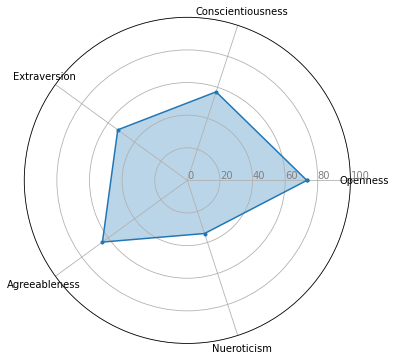

In [13]:
plot_radar(demo_calssification)

# Exploring Large Texts

In [109]:
dog_text = """Dogs don’t know what they look like. Dogs don’t even know what size they are.
                No doubt it’s our fault, for breeding them into such weird shapes and sizes. 
                My brother’s dachshund, standing tall at eight inches,
                would attack a Great Dane in the full conviction that she could tear it apart. 
                When a little dog is assaulting its ankles the big dog often stands there looking confused — 
                “Should I eat it? Will it eat me? I am bigger than it, aren’t I?” 
                But then the Great Dane will come and try to sit in your lap and mash you flat, under the impression that it is a Peke-a-poo… 
                Cats know exactly where they begin and end. When they walk slowly out the door that you are holding open for them,
                and pause, leaving their tail just an inch or two inside the door, they know it.
                They know you have to keep holding the door open. That is why their tail is there. It is a cat’s way of maintaining a relationship.
                Housecats know that they are small, and that it matters. When a cat meets a threatening dog and can’t make either a horizontal 
                or a vertical escape, it’ll suddenly triple its size, inflating itself into a sort of weird fur blowfish, and it may work,
                because the dog gets confused again — “I thought that was a cat. Aren’t I bigger than cats? Will it eat me?”
                … A lot of us humans are like dogs: we really don’t know what size we are, how we’re shaped, what we look like.
                The most extreme example of this ignorance must be the people who design the seats on airplanes. At the other extreme,
                the people who have the most accurate, vivid sense of their own appearance may be dancers.
                What dancers look like is, after all, what they do"""

In [110]:
classification = classifier.classify(dog_text)

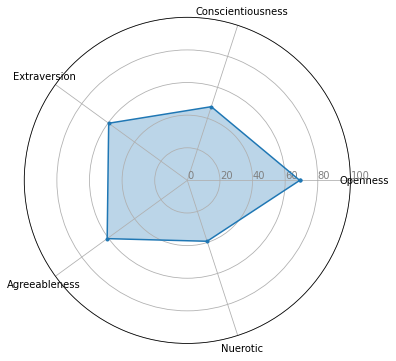

In [111]:
plot_radar(classification)

In [112]:
tender_text = """ Keep your head high,” I tell Tender. “Suck in your gut, Soldier! A grateful humanity won't forget you!”
                He gives me a look, and I see that he’s in no mood for jokes. He’s right–this is no joke. But when you’re leaving for the Zone, it’s one of two things: you start bawling, or you crack jokes–and I’m sure as hell not crying. I take a look at Kirill. He’s holding up OK, only mouthing something silently, as if praying.
                “Praying?” I ask. “Pray, pray! The farther into the Zone, the closer to heaven.”
                “What?” He says.
                “Pray!” I yell. “Stalkers cut in line at the gates of heaven!”
                And he suddenly smiles and pats me on the back, as if to say,
                “Nothing will happen as long as you are with me, and if it does, well, we only die once.” God, he’s a funny guy."""

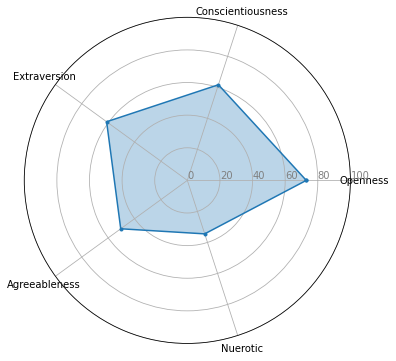

In [113]:
classification = classifier.classify(tender_text)
plot_radar(classification)

In [114]:
gloomy_sunday = """ Sunday is gloomy, my hours are slumberless
                    Dearest, the shadows, I live with are numberless
                    Little white flowers will never awaken you
                    Not where the black coach of sorrow has taken you
                    Angels have no thought of ever returning you
                    Would they be angry if I thought of joining you?
                    Gloomy Sunday
                    Gloomy is Sunday, with shadows I spend it all
                    My heart and I have decided to end it all
                    Soon there'll be candles and prayers that are sad, I know
                    Let them not weep, let them know that I'm glad to go
                    Death is no dream, for in death I'm caressing you
                    With the last breath of my soul, I'll be blessing you
                    Gloomy Sunday
                    Dreaming
                    I was only dreaming
                    I wake and I find you asleep
                    In the deep of my heart, dear
                    Darling, I hope that my dream never haunted you
                    My heart is telling you how much I wanted you
                    Gloomy Sunday
                """

{'OPN': 73.72863788895039, 'CON': 54.19227518351808, 'EXT': 60.45431696146818, 'AGR': 60.10464634601216, 'NEU': 33.11472913594348}


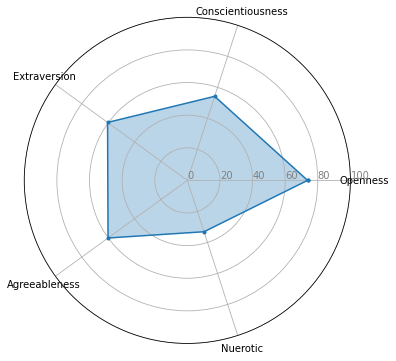

In [115]:
classification = classifier.classify(gloomy_sunday)
print(classification)

plot_radar(classification)

In [116]:
ogden_nash = """
    There is a knocking in the skull,
    An endless silent shout
    Of something beating on a wall,
    And crying, “Let me out!”

    That solitary prisoner
    Will never hear reply.
    No comrade in eternity
    Can hear the frantic cry.

    No heart can share the terror
    That haunts his monstrous dark.
    The light that filters through the chinks
    No other eye can mark.

    When flesh is linked with eager flesh,
    And words run warm and full,
    I think that he is loneliest then,
    The captive in the skull.

    Caught in a mesh of living veins,
    In cell of padded bone,
    He loneliest is when he pretends
    That he is not alone.

    We’d free the incarcerate race of man
    That such a doom endures
    Could only you unlock my skull,
    Or I creep into yours.

"""

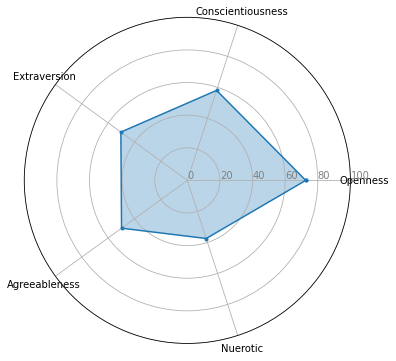

In [117]:
plot_radar(classifier.classify(ogden_nash))

Conversation

In [121]:
hiniku = [
"I like kant",
"I think means are ends in themselves",
"If the many world theory of quantum mechanics is real, all realities exist. I'm not a determinist.",
"Utalitariaism is a moral structure for determinists.",
"But if we truely have freewill, we should base morality on autonomy.",
"Like kant does",
"I agree, freewill cannot be proven, we can only observe the past. You would need to be able to see the future to test for freewill. I do believe in it though."
]

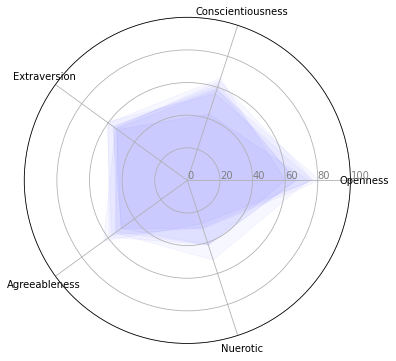

In [153]:
plot_radars(map(lambda text: classifier.classify(text),hiniku))

In [156]:
raven = ["Ever just wanna cause chaos for no fucking reason, or just do something really retarded that you'll regret later on maybe",
         "Stress",
         "And hello father. tender frog holding a heart above its head",
         "Idk honestly, working on it though",
         "Thanks for reminding me though. Smiling blushing cat",
         "I sometimes tend to forget when it over loads"]

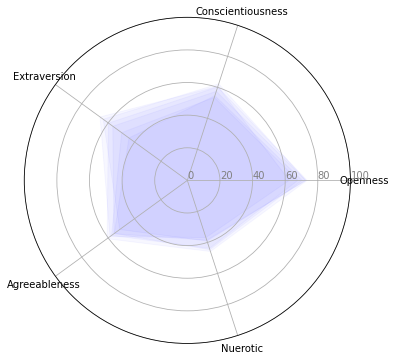

In [157]:
plot_radars(map(lambda text: classifier.classify(text),raven))

In [15]:
shekel = ["I was probably literally cast out because for being associated with you dude",
    "I don't think anyone there actually disliked me.",
    "except fucking krispy",
    "lol",
    "my theory is that luna was mald as fuck",
    "and cried about it to the owner",
    "what, who else, wtf",
    "bro we have played before with absolutely no problem",
    "you're stuck on one round",
    "one single round",
    "where everyone knew what we were saying except for you",
    "definitely don't think any of the guys had a problem with me anyway",
    "wtf",
    "lol bruh i've heard conflicting information about my status now",]


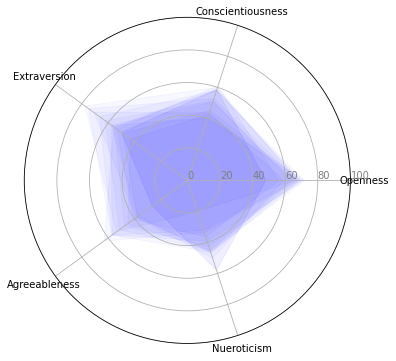

In [164]:
plot_radars(map(lambda text: classifier.classify(text),shekel))

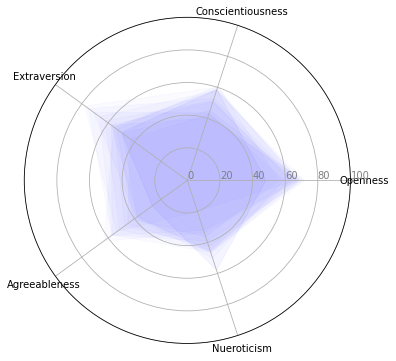

In [175]:
plot_radars(map(lambda text: classifier.classify(text),shekel))

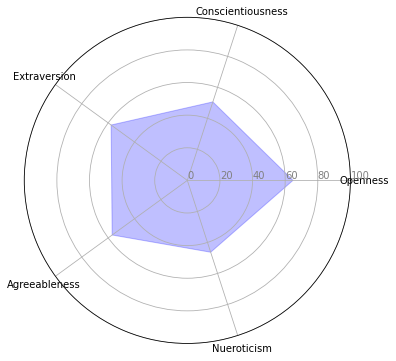

In [176]:
plot_radars(map(lambda text: classifier.classify(text),shekel[-1:]))

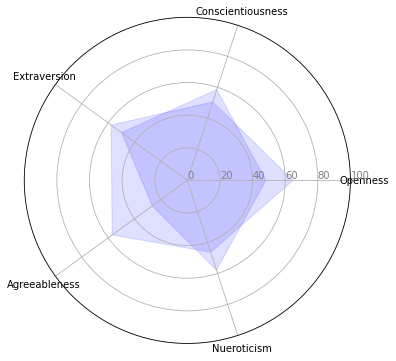

In [177]:
plot_radars(map(lambda text: classifier.classify(text),shekel[-2:]))

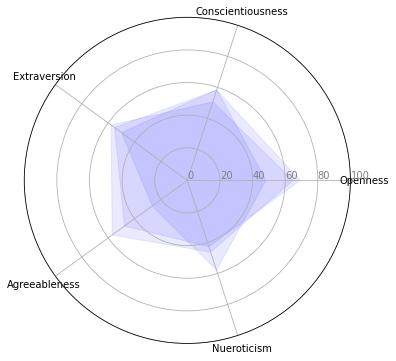

In [178]:
plot_radars(map(lambda text: classifier.classify(text),shekel[-3:]))

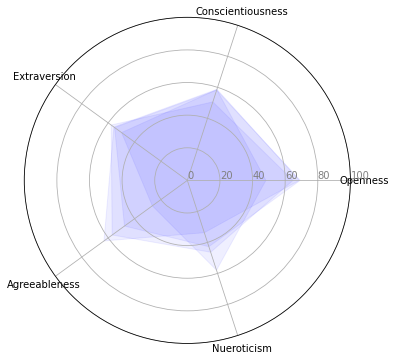

In [179]:
plot_radars(map(lambda text: classifier.classify(text),shekel[-4:]))

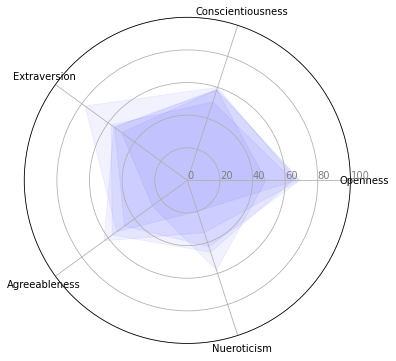

In [180]:
plot_radars(map(lambda text: classifier.classify(text),shekel[-5:]))

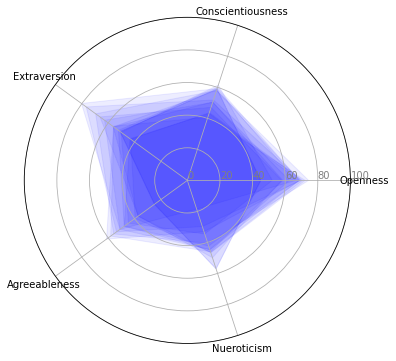

In [34]:
plot_radars(map(lambda text: classifier.classify([text]),shekel[:]))